In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

In [98]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [77]:
# importing the train dataset
mtr=pd.read_csv('mtrain.csv')
mtr

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [78]:
# importing the test dataset
mtst=pd.read_csv('mtest.csv')
mtst

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [79]:
# finding the columns of train dataset
print('train data column names',mtr.columns,'\n')
# finding the columns name of test dataset
print('test data column names',mtst.columns)

train data column names Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object') 

test data column names Index(['id', 'comment_text'], dtype='object')


In [80]:
# finding the data types of each columns of train dataset
print('data types of each column of train data \n :',mtr.dtypes,'\n')
# finding the data types of each columns of test dataset
print('data types of each column of test data \n :',mtst.dtypes)

data types of each column of train data 
 : id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object 

data types of each column of test data 
 : id              object
comment_text    object
dtype: object


In [81]:
# finding the null values present in the data
print('train data ',mtr.isnull().sum(),'\n')
print('test data',mtst.isnull().sum())
# it shows that there is no null values are present in the dataset

train data  id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64 

test data id              0
comment_text    0
dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755) 

AxesSubplot(0.125,0.125;0.496x0.755)


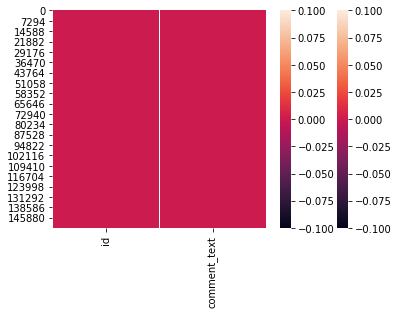

In [82]:
# using heatmap, analysing the null values present in the data
print(sns.heatmap(mtr.isnull()),'\n')
print(sns.heatmap(mtst.isnull()))
# it is showung that there is no null values present in the data  

In [83]:
# Adding a new feature Length to identify the length of each message
mtr['Length']=mtr.comment_text.str.len()
mtst['Length']=mtst.comment_text.str.len()

In [84]:
# coverting the whole comment text into smaller text
mtr['comment_text']=mtr['comment_text'].str.lower()

In [85]:
# replace money symbols with 'moneysymb'
mtr['comment_text']=mtr['comment_text'].str.replace(r'$','dollars')
# Replace URLs with webaddress
mtr['comment_text']=mtr['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# replace numbers as well 
mtr['comment_text']=mtr['comment_text'].str.replace(r'\d+(\.\d+)?','number')
# replace phone numbers 
mtr['comment_text']=mtr['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
# removing the punctuation
mtr['comment_text']=mtr['comment_text'].str.replace(r'[^\w\d\s]', ' ')
# replace white spcae with single space
mtr['comment_text']=mtr['comment_text'].str.replace(r'\s+',' ')
# remove leading or trailing white space 
mtr['comment_text']=mtr['comment_text'].str.replace(r'^\s+|\s+?$','')

In [86]:
# coverting the whole news message into smaller text
mtst['comment_text']=mtst['comment_text'].str.lower()

In [87]:
# replace money symbols with 'moneysymb'
mtst['comment_text']=mtst['comment_text'].str.replace(r'$','dollars')
# Replace URLs with webaddress
mtst['comment_text']=mtst['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# replace numbers as well 
mtst['comment_text']=mtst['comment_text'].str.replace(r'\d+(\.\d+)?','number')
# replace phone numbers 
mtst['comment_text']=mtst['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
# removing the punctuation
mtst['comment_text']=mtst['comment_text'].str.replace(r'[^\w\d\s]', ' ')
# replace white spcae with single space
mtst['comment_text']=mtst['comment_text'].str.replace(r'\s+',' ')
# remove leading or trailing white space 
mtst['comment_text']=mtst['comment_text'].str.replace(r'^\s+|\s+?$','')

In [88]:
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english')+ ['u','ur','4','2','im','dont','doin','ure','ok'])

mtr['comment_text']=mtr['comment_text'].apply(lambda x:' '.join(
term for term in x.split() if term not in stop_words))

mtst['comment_text']=mtst['comment_text'].apply(lambda x:' '.join(
term for term in x.split() if term not in stop_words))

In [89]:
# Adding cleaned length new feature
mtr['Clean_length']=mtr.comment_text.str.len()
mtst['Clean_length']=mtst.comment_text.str.len()

In [90]:
mtr.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Length,Clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,172
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,97
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29


In [91]:
print('original length',mtr.Length.sum())
print('clean_length',mtr.Clean_length.sum())

original length 62893130
clean_length 40716299


In [92]:
print('original length',mtst.Length.sum())
print('clean_length',mtst.Clean_length.sum())

original length 55885733
clean_length 36131347


In [ ]:
# message distribution before data claening
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(mtr[mtr['malignant']==1]['Length'],bins=20,ax=ax[0],label='Malignant messages distribution',color='r')
ax[0].set_xlabel('Malignant msg length')
ax[0].legend()

sns.distplot(mtr[mtr['malignant']==0]['Length'],bins=20,ax=ax[1],label='Non Malignant messages distribution',color='b')
ax[1].set_xlabel('Non Malignant msg length')
ax[1].legend()

In [ ]:
# message distribution after data claening
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(mtr[mtr['malignant']==1]['Clean_length'],bins=20,ax=ax[0],label='Malignant messages distribution',color='r')
ax[0].set_xlabel('Malignant msg length')
ax[0].legend()

sns.distplot(mtr[mtr['malignant']==0]['Clean_length'],bins=20,ax=ax[1],label='Non Malignant messages distribution',color='b')
ax[1].set_xlabel('Non Malignant msg length')
ax[1].legend()

In [ ]:
# message distribution before data claening
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(mtr[mtr['rude']==1]['Length'],bins=20,ax=ax[0],label='Rude messages distribution',color='r')
ax[0].set_xlabel('Rude msg length')
ax[0].legend()

sns.distplot(mtr[mtr['rude']==0]['Length'],bins=20,ax=ax[1],label='Non-Rude messages distribution',color='b')
ax[1].set_xlabel('Non-rude msg length')
ax[1].legend()

In [99]:
from wordcloud import WordCloud

## Getting sense of loud words in 'abuse'
abs=mtr['comment_text'][mtr['abuse']==1]
abs_cloud=WordCloud(width=400, height=200,background_color='white',max_words=50).generate(' '.join(abs))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(abs_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

TypeError: 'module' object is not callable

In [ ]:
## Getting sense of loud words in 'loathe'
loath=mtr['comment_text'][mtr['loathe']==1]
loath_cloud=WordCloud(width=400, height=200,background_color='white',max_words=50).generate(' '.join(loath))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(loath_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

tf=TfidfVectorizer()
lgr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
models=[]
models.append(('LogisticRegression',lgr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

features_train=tf.fit_transform(mtr['comment_text'])
features_test=tf.fit_transform(mtst['comment_text'])

In [103]:
x=features_train         # feature columns 
y=mtr['malignant']        # target column

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for i,model in models:
    print('******************',i,'*******************','\n')
    Model.append(i)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score is ',AS,'\n')
    score.append(AS*100)
    CM=confusion_matrix(y_test,pre)
    print('Confusion Matrix is \n',CM,'\n')
    print('Classification Report is',classification_report(y_test,pre),'\n')
    cs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score is ',cs,'\n')
    cvs.append(cs*100)
    fpr,tpr,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('AUC ROC Score is ',roc_auc,'\n')
    rocscore.append(roc_auc*100)

****************** LogisticRegression ******************* 

Accuracy Score is  0.9548542350788359 

Confusion Matrix is 
 [[35896   182]
 [ 1619  2196]] 

Classification Report is               precision    recall  f1-score   support

           0       0.96      0.99      0.98     36078
           1       0.92      0.58      0.71      3815

    accuracy                           0.95     39893
   macro avg       0.94      0.79      0.84     39893
weighted avg       0.95      0.95      0.95     39893
 

Cross Validation Score is  0.9550482237086115 

AUC ROC Score is  0.7852889585307267 

****************** DecisionTreeClassifier ******************* 

Accuracy Score is  0.9447020780588073 

Confusion Matrix is 
 [[35032  1046]
 [ 1160  2655]] 

Classification Report is               precision    recall  f1-score   support

           0       0.97      0.97      0.97     36078
           1       0.72      0.70      0.71      3815

    accuracy                           0.94     39893
  

In [ ]:
result=pd.DataFrame({'Model':Model,'Accuracy Score':score,'CVS':cvs,'ROC AUC':rocscore})
result

In [ ]:
from sklearn.externals import joblib
joblib.dump(,'.pkl')